<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Вступление" data-toc-modified-id="Вступление-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Вступление</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Сравнение-ранее-созданного-recovery-и-высчитанного-нами-recovery" data-toc-modified-id="Сравнение-ранее-созданного-recovery-и-высчитанного-нами-recovery-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение ранее созданного recovery и высчитанного нами recovery</a></span></li><li><span><a href="#Анализ-признаков,-которых-нет-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-которых-нет-в-тестовой-выборке-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ признаков, которых нет в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов" data-toc-modified-id="Концентрация-металлов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Концентрация металлов</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья" data-toc-modified-id="Распределения-размеров-гранул-сырья-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья</a></span></li><li><span><a href="#Суммарную-концентрацию-всех-веществ-на-разных-стадиях" data-toc-modified-id="Суммарную-концентрацию-всех-веществ-на-разных-стадиях-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Суммарную концентрацию всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Вступление

Добрый день, я Атаков Александр и сегодня  мы с вами рассмотрим проект компании "Цифра". Дели и описание написаны сверху, но хочется отметить некоторые моменты:
- Данные хранятся в трех выборках:
    - обучающая - данные, предназначенные для обучения модели и подготовки модели для тестовой выборки
    - тестовая - в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. Она предназначена для финальной проверки модели
    - общая - содержит данные из обучающей и тестовой выборок
- в обучающей и общей выборках есть следующие признаки:
    - rougher - флотация
    - primary_cleaner - первый этап очистки
    - secondary_cleaner - второй этап очистки
    - final - финальный объект
- у каждого признака есть свой тип параметра, которые равняются:
    - input - параметры сырья
    - output - параметры продукта
    - state - параметры текущего состояния
    - calculation - расчетные характеристики
- у тестовой выборки отсутствует признак final, так как это целевой признак, по которому мы будем предсказывать верность модели

Давайте перейдем к своей работе, а начнем мы с импорта библиотек, которые нам понадобятся на протяжении всего проекта:

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.dummy import DummyRegressor


## Подготовка данных

### Изучение данных
Библиотеки импортированы, давайте приступим к загрузке данных и их подготовке к будущей работе:

In [2]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train_new.csv') # обучающая выборка
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test_new.csv') # тестовая выборка
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full_new.csv') # общая выборка

Переменные с данными (датасеты) созданы, теперь можно их изучить. Для изучения мы воспользуемся функцией, которая будет показывать первые пять значений, краткую информацию о самом датасете и цифровую информацию о численных признаках:

In [3]:
def show_data(df): # функция показа данных 
    return display(df.head()), display(df.info()), display(df.describe())

In [4]:
print("Давайте посмотрим на обучающую выборку:")
show_data(gold_recovery_train) # показ данных обучающей выборки

Давайте посмотрим на обучающую выборку:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


(None, None, None)

In [5]:
print("Давайте посмотрим на тестовую выборку:")
show_data(gold_recovery_test) # показ данных тестовой выборки

Давайте посмотрим на тестовую выборку:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


(None, None, None)

In [6]:
print("Давайте посмотрим на общую выборку:")
show_data(gold_recovery_full) # показ данных общей выборки

Давайте посмотрим на общую выборку:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


(None, None, None)

Как можно заметить, в наших данных отметить следующие моменты:
- Присутствуют пропуски в столбцах
- наименования столбцов написаны удобно и верно
- столбец `date` написан в неверном формате данных (вместо `date` `object`)
- выбросов не замечено
- присутствуют отрицательные значения, но они актуальные (не стоит изменять)

В итоге мы должны провести следующие действия:
- пропуски
- перевод из `object` в `date`

### Сравнение ранее созданного recovery и высчитанного нами recovery
Пусть у нас уже есть созданный столбец `recovery`, но проверить его верность все же стоит - для этого сами вычислим метрику `recovery` и сравним с ранее созданным столбцом метрикой `mae`. Для реализации данной мысли, мы создадим функцию, которая принимая столбцы с необходимыми данными выдаст нам нашу метрику:

In [7]:
def calculate_recovery(concentrate_au_before_rougher, concentrate_au_after_rougher, concentrate_au_tail): # функция вычисления recovery
    recov = ((concentrate_au_after_rougher*(concentrate_au_before_rougher - concentrate_au_tail))/
             (concentrate_au_before_rougher*(concentrate_au_after_rougher - concentrate_au_tail)))*100
    return recov

In [8]:
ready_recovery = gold_recovery_train['rougher.output.recovery'] # изначальный столбец recovery

predicted_recovery = calculate_recovery(gold_recovery_train['rougher.input.feed_au'],  
                                        gold_recovery_train['rougher.output.concentrate_au'], 
                                        gold_recovery_train['rougher.output.tail_au']) # вычисленный нами recovery

difference_ready_between = mean_absolute_error(ready_recovery, predicted_recovery) # сравнение recovery
difference_ready_between

9.682896147825551e-15

Как видно, разница не особо велика - всего-то на 9 единиц, но все же, разница есть, а это значит, что мы заменим исходный столбец на наш ранее созданный:

In [9]:
gold_recovery_train['rougher.output.recovery'] = predicted_recovery
gold_recovery_train['rougher.output.recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

### Анализ признаков, которых нет в тестовой выборке
Для полного понимания данных, нам надо просмотреть, какие данные есть в тестовой выборке, а каких нет. Давайте сравним признаки тестовой выборки с признаками обучающей выборки (воспользуемся методом `columns`):

In [10]:
columns_train = gold_recovery_train.columns
columns_test = gold_recovery_test.columns
columns_not_in_test = []

for column in columns_train:
    if column not in columns_test:
        columns_not_in_test.append(column)

columns_not_in_test

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Как можно заметить, у тестовой выборки отсутствуют типы параметров, которые отвечают за выходное значение продукта и за его расчетные характеристики. Для более информативной статистики давайте определим, какие параметры отстутствуют в тестовой выборке:
- concentrate - концентрация определенных веществ в продукте
- recovery - эффективность обогащения
- tail - остатки веществ в продукте 
- rougher additions - концентрация флотационных реагентов в продукте

### Предобработка данных
Вот мы и изучили данные, а это значит, что мы можем приступить к одному из самых важных этапов нашего проекта - предобработка данных. Важен данный этап по многим причинам, одни из них - `garbage in - garbage out` (мусор на входе мусор при выходе)

Первым делом давайте решим вопрос с пропусками. Давайте посмотрим, сколько пропусков у нас вообще есть в данных:

In [11]:
def concentrate_null_values_15(df):
    return (df.isna().sum()/df.count()).sort_values(ascending=False).head(15)

In [12]:
print('Рассмотрим, какая доля у столбцов с пропусками от общего количества данных в обучаещей выборке:')
concentrate_null_values_15(gold_recovery_train)

Рассмотрим, какая доля у столбцов с пропусками от общего количества данных в обучаещей выборке:


secondary_cleaner.output.tail_sol           0.127950
rougher.state.floatbank10_e_air             0.031795
rougher.input.floatbank11_xanthate          0.031193
primary_cleaner.output.concentrate_sol      0.020630
secondary_cleaner.state.floatbank2_a_air    0.015576
final.output.concentrate_sol                0.015138
rougher.input.feed_size                     0.010282
final.output.tail_pb                        0.007118
rougher.input.feed_pb                       0.007118
primary_cleaner.input.xanthate              0.007118
primary_cleaner.output.concentrate_pb       0.006115
rougher.input.feed_sol                      0.005543
primary_cleaner.output.tail_sol             0.003262
rougher.input.floatbank11_sulfate           0.002551
primary_cleaner.input.depressant            0.002267
dtype: float64

Признак второго этапа очистки в параметре хвоста имеет 12% пустых значений, флотация параметра состояния 3% пропусков и т.д. В итоге имеем 7 признаков, где пропуски в большом количестве (где один из них имеет целых 12% пропусков)

In [13]:
print('Рассмотрим, какая доля у столбцов с пропусками от общего количества данных в тестовой выборке:')
concentrate_null_values_15(gold_recovery_test)

Рассмотрим, какая доля у столбцов с пропусками от общего количества данных в тестовой выборке:


rougher.input.floatbank11_xanthate            0.004748
rougher.input.feed_sol                        0.003986
secondary_cleaner.state.floatbank3_a_air      0.001704
rougher.input.floatbank11_sulfate             0.001515
primary_cleaner.input.depressant              0.000946
rougher.input.floatbank10_sulfate             0.000946
primary_cleaner.input.sulfate                 0.000757
primary_cleaner.input.xanthate                0.000757
secondary_cleaner.state.floatbank2_a_air      0.000567
rougher.input.feed_rate                       0.000567
secondary_cleaner.state.floatbank2_b_air      0.000378
rougher.input.feed_size                       0.000189
secondary_cleaner.state.floatbank6_a_level    0.000000
rougher.input.floatbank10_xanthate            0.000000
rougher.input.feed_au                         0.000000
dtype: float64

В данной выборке пропусков очень мало, почти нет (они даже не доходят до 0.5%), поэтому здесь целесообразнее удалить такие пропуски

In [14]:
print('Рассмотрим, какая доля у столбцов с пропусками от общего количества данных в общей выборке:')
concentrate_null_values_15(gold_recovery_full)

Рассмотрим, какая доля у столбцов с пропусками от общего количества данных в общей выборке:


secondary_cleaner.output.tail_sol           0.098807
rougher.input.floatbank11_xanthate          0.023860
rougher.state.floatbank10_e_air             0.022944
primary_cleaner.output.concentrate_sol      0.019403
secondary_cleaner.state.floatbank2_a_air    0.011447
final.output.concentrate_sol                0.010974
rougher.input.feed_size                     0.007515
primary_cleaner.output.concentrate_pb       0.006003
primary_cleaner.input.xanthate              0.005379
final.output.tail_pb                        0.005223
rougher.input.feed_pb                       0.005171
rougher.input.feed_sol                      0.005119
primary_cleaner.output.tail_sol             0.003200
rougher.input.floatbank11_sulfate           0.002269
primary_cleaner.input.depressant            0.001907
dtype: float64

В общей выборке возникла похожая ситуация, как и с обучающей - данные с пропусками есть, и средни них есть весомые признаки, удалив которые мы лишь ухудшим данные. Для таких признаков было бы хорошо, что-то сделать, поэтому мы воспользуемся методом интерполяции - `interpolate()`. Это очень мощная функция для заполнения недостающих значений. Он использует различные методы интерполяции для заполнения недостающих значений вместо жесткого кодирования значения:

In [15]:
gold_recovery_train = gold_recovery_train.interpolate()
gold_recovery_test = gold_recovery_test.interpolate()
gold_recovery_full = gold_recovery_full.interpolate()
# gold_recovery_train.dropna(inplace=True)
# gold_recovery_test.dropna(inplace=True)
# gold_recovery_full.dropna(inplace=True)
print(gold_recovery_train.shape, gold_recovery_test.shape, gold_recovery_full.shape)

(14149, 87) (5290, 53) (19439, 87)


Пустые строки были обработаны, а значит можно перейти к изменению типа данных в столбце `date`. Изначально, он у нас был записан как `object`, но это не верно, он должен быть в формате `datetime`. Исправлять это мы будем методом `pd.to_datetime`: 

In [16]:
def change_object_to_datetime(df):
    return pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

gold_recovery_train['date'] = change_object_to_datetime(gold_recovery_train)
gold_recovery_test['date'] = change_object_to_datetime(gold_recovery_test)
gold_recovery_full['date'] = change_object_to_datetime(gold_recovery_full)

In [17]:
gold_recovery_full['date'].head()

0   2016-01-15 00:00:00
1   2016-01-15 01:00:00
2   2016-01-15 02:00:00
3   2016-01-15 03:00:00
4   2016-01-15 04:00:00
Name: date, dtype: datetime64[ns]

Тип данных с `object` удачно был изменен в `datetime`

Отлично, мы выполнили предобработку данных: 
- пропуски заполнили интерполяцией 
- изменили тип данных с `object` в `datetime`

Теперь мы можем приступить к основной работе, но перед этим нам предстоит проанализировать данные, так как заказчик хочет убедиться в том, что все данные расписаны правильно и он не понесет убыток

## Анализ данных
Данный этап направлен на более подробное изучение данных в наших выборках: как менялась концентрация металлов, распределения размеров гранул сырья, суммарная концентрация всех веществ на разных стадиях

### Концентрация металлов
Первым делом мы рассмотрим то, как менялась концентрация металлов на этапах очистки. Для этого воспользуемся признаками `rougher.input...`, `rougher.output...`, `primary_cleaner.output...` и `final.output...`, где вместо многоточия будут стоять концентрации металлов на этапах очистки:

Содержание золота на различных этапах очистки


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5315686b50>,
      dtype=object)

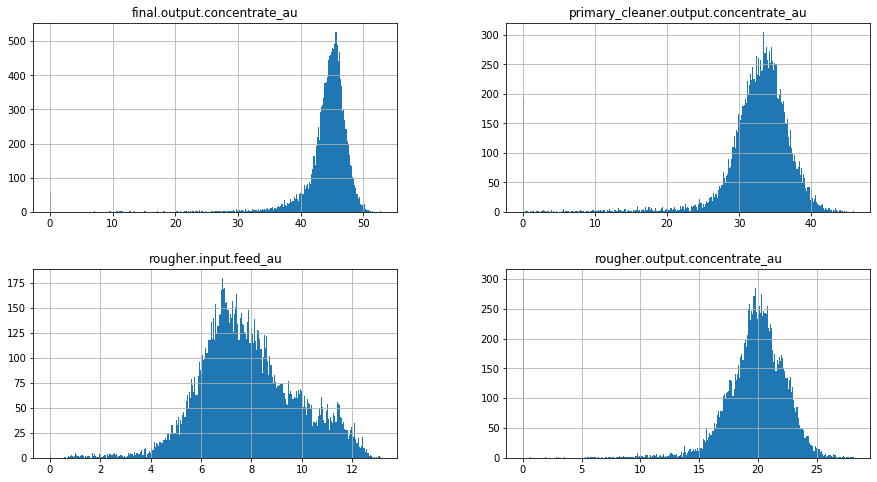

In [18]:
gold_concentrate = gold_recovery_train[['rougher.input.feed_au', 'rougher.output.concentrate_au',
                                       'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]

argentum_concentrate = gold_recovery_train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
                                            'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]

plumbum_concentrate = gold_recovery_train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
                                           'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

print('Содержание золота на различных этапах очистки')
gold_concentrate.hist(bins=300, figsize=(15,8))

Содержание серебра на различных этапах очистки


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5311575fd0>,
      dtype=object)

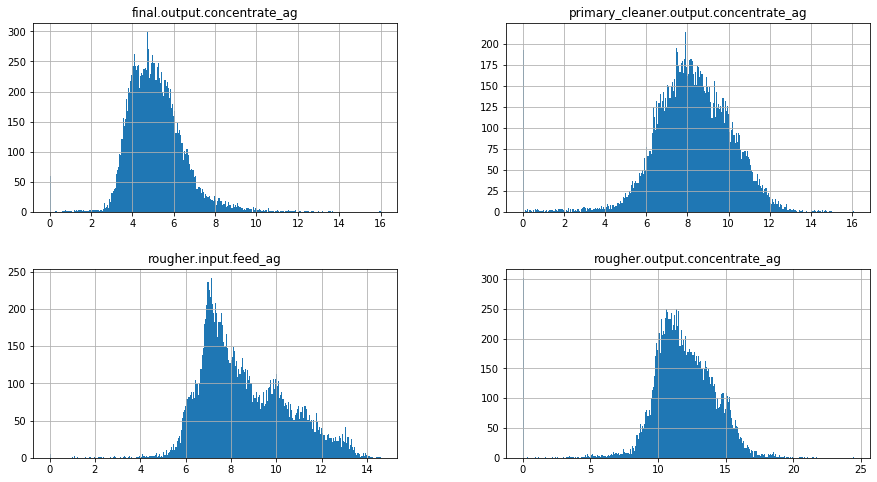

In [19]:
print('Содержание серебра на различных этапах очистки')
argentum_concentrate.hist(bins=300, figsize=(15,8))

Содержание свинца на различных этапах очистки


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f531620ac10>,
      dtype=object)

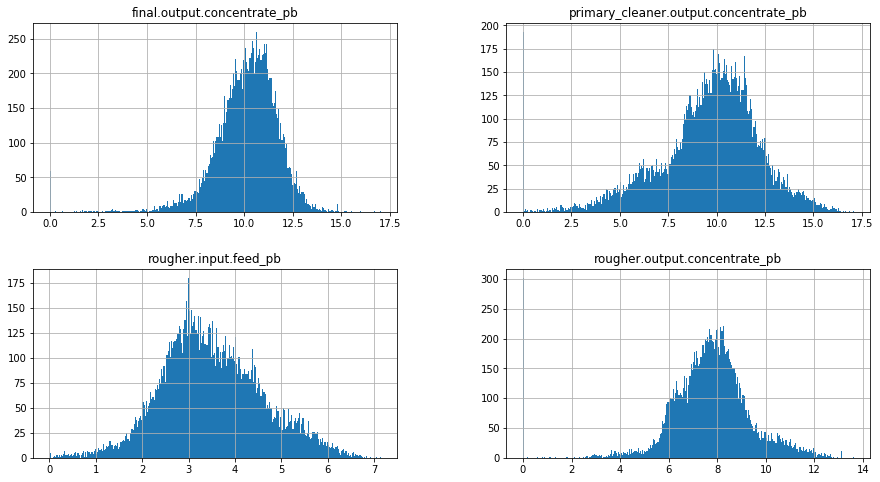

In [20]:
print('Содержание свинца на различных этапах очистки')
plumbum_concentrate.hist(bins=300, figsize=(15,8))

Как можно заметить концентрация серебра  значительно уменьшилась, а вот процент содержания золота и свинца выросли. Все это говорит нам о том, что после двух очисток мы получили более качественный продукт, который содержит в себе больше золота, но который также имеет некоторую часть свинца в составе (в то время как серебро из состава убавилось)

Также заметно, что никаких выбросов в данных у нас нет (значения не отходят слишком далеко друг от друга), а это значит, что ничего искать и тем более удалять не нужно

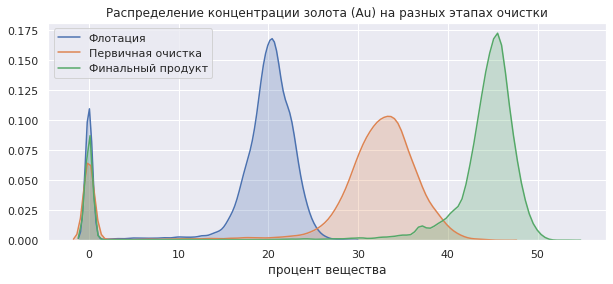

### Распределения размеров гранул сырья
Следующий шаг - сравнить размеры гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной. Для сравнения размеров, воспользуемся сравнением двух выборок методом `st.ttest_ind()`. В качестве нулевой гипотезы возьмем утверждение, что `размеры гранул равны`. Альтернативная гипотеза будет равна `размеры гранул различны`

Проблема может возникнуть в размерах выборок, ведь в тестовой размер составляет 5229, а в обучающей - 11017. Решением проблемы можно считать срез данных по размеру тестовой выборки, но тут возникает вопрос перемешивания данных, ведь в конце, возможно, будут совершенно различные размеры гранул сырья. И тут нам на помощь придет метод `shuffle`. 

In [21]:
train_granul_size = gold_recovery_train['rougher.input.feed_size']
train_granul_size_shuffled = shuffle(train_granul_size, random_state=159)
train_granul_size_cutted = train_granul_size_shuffled[:len(gold_recovery_test)]

test_granul_size = gold_recovery_test['rougher.input.feed_size']

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(train_granul_size_cutted, test_granul_size)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 7.728999954194491e-23
Отвергаем нулевую гипотезу


p-value оказалось слишком низким, а это значит, что наши гранулы различны по размерам. Значение далеко от критического уровня, поэтому выходит, что наша модель будет работать не так хорошо, как бы нам этого хотелось

### Суммарную концентрацию всех веществ на разных стадиях
А теперь давайте проверим суммарную концентрацию веществ на разных этапах: в сырье, в черновом варианте и в итогом (чистом). Для этого воспользуемся признаками `rougher.input...`, `rougher.output...` и `final.output...` и методом `sum()`. Однако давайте также проверим суммарную концентрацию металлов для каждого вещества, ведь если сумма покажет нам 0 грамм всех металлов, то это точно ошибка, ведь что-то да должно быть

Для проверки суммы металлов в каждом веществе, мы создадим функцию, которая будет проверять, равна ли сумма всех металлов нулю: если да, то она увеличивает счетчик нулевых строк. В итоге мы получаем значение, равное количеству нулевых строк:

In [22]:
def count_zero_rows_substance_df(df): # функция берет какой-то датасет
    sum_in_row = 0 # сумма металлов в веществе
    count_zero_rows = 0 # счетчик нелевой суммы

    for index, row in df.iterrows(): # начинаем цикл. Берем каждую строку
        for column in df: # берем каждый столбец 
            sum_in_row += row[column] # берем значение ячейки по строке и столбцу
        if sum_in_row == 0: # если общая сумма по всем столбцам равна 0, то счетчик увеличивается на 1
            count_zero_rows += 1
        sum_in_row = 0 # после подсчета мы должны обнулить сумму по строке 
    return(count_zero_rows) 

In [23]:
substance_raw = gold_recovery_train[['rougher.input.feed_ag', 'rougher.input.feed_pb', 
                    'rougher.input.feed_sol', 'rougher.input.feed_au']] # берем данные по сырью
count_zero_rows_raw = count_zero_rows_substance_df(substance_raw) # закидываем данные в функцию подсчета нулевых строк
print(count_zero_rows_raw)

0


Отлично, в сырье у нас нет нулевых строк, поэтому можно смело идти дальше

In [24]:
substance_rougher = gold_recovery_train[['rougher.output.concentrate_ag', 
                                         'rougher.output.concentrate_pb', 
                                         'rougher.output.concentrate_sol', 
                                         'rougher.output.concentrate_au', ]] # данные после флотации

count_zero_rows_rougher = count_zero_rows_substance_df(substance_rougher) # данные по флотации закидываем в функцию
print(count_zero_rows_rougher)

297


Вот и начались пустые строки. Здесь у нас 297 строк, а это значит, что у нас 297 ошибочных строк, которые нужно будет удалить, ведь как-то заменить данные мы никак не можем

In [25]:
substance_final = gold_recovery_train[['final.output.concentrate_ag', 'final.output.concentrate_pb',
                     'final.output.concentrate_sol', 
                    'final.output.concentrate_au']] # финальные данные, после всех очисток
count_zero_rows_final = count_zero_rows_substance_df(substance_final) # финальные данные кидаем в функцию
print(count_zero_rows_final)

58


Конечно нулевых строк у нас не так много, но все же, они есть.

Итак, нулевые строки мы будем удалять, а для этого мы воспользуемся функцией, которая будет принимать на вход датасет и возвращать его же, но уже без нулевых строк

In [26]:
def delete_zeroes_concentrate_rows(df): # функция удаления нулевых строк 
    sum_in_row = 0 # переменная подсчета суммы строки
    for i, row in df.iterrows(): # берем строки
            for column in df: # берем столбцы
                sum_in_row += row[column] # считаем сумму
            if sum_in_row == 0: # если сумма равна 0, то мы удаляем данную строку с датасета, который был принят функцией 
                df = df.drop(df.index[i]) 
            sum_in_row = 0
    return df # возвращаем измененный датасет 

In [27]:
print(substance_rougher.shape) # считаем размер датасета перед удалением 

substance_rougher = delete_zeroes_concentrate_rows(substance_rougher) # применяем функцию удаления строк с нулевой суммой строки
 
print(substance_rougher.shape) # считаем размер датасета после удаления

(14149, 4)
(13852, 4)


In [28]:
print(substance_final.shape)

substance_final = delete_zeroes_concentrate_rows(substance_final)

print(substance_final.shape)

(14149, 4)
(14091, 4)


Отлично, мы удалили нулевые строки в наших датасетах, но это еще не конец, ведь у нас есть наша выборка, из которой мы взяли все эти датасеты с нулевыми строками. Соответственно, мы должны заменить все данные, которые мы взяли с выборки на измененные датасеты. После такой замены у нас появятся пропуски, ведь мы заменяем данные на сокращенную их форму, значения которые не были в измененных датасетах превратятся в `nan`. Такие значения мы просто выкидываем

In [29]:
gold_recovery_train[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb','rougher.output.concentrate_sol', 
                     'rougher.output.concentrate_au', ]] = substance_rougher # данные после флотации

gold_recovery_train[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 
                     'final.output.concentrate_au']] = substance_final # данные после всех этапах очистки

gold_recovery_train.dropna(inplace=True) # удаляем пропуски, которые образовались после подстановки данных
gold_recovery_train.shape

(13795, 87)

In [30]:
gold_recovery_train.isna().sum().sort_values(ascending=False) # проверяем на наличие пропусков после подстановки

secondary_cleaner.state.floatbank6_a_level            0
rougher.calculation.floatbank10_sulfate_to_au_feed    0
primary_cleaner.state.floatbank8_a_level              0
primary_cleaner.state.floatbank8_b_air                0
primary_cleaner.state.floatbank8_b_level              0
                                                     ..
rougher.state.floatbank10_d_air                       0
rougher.state.floatbank10_d_level                     0
rougher.state.floatbank10_e_air                       0
rougher.state.floatbank10_e_level                     0
date                                                  0
Length: 87, dtype: int64

In [31]:
metal_sum_raw = gold_recovery_train[['rougher.input.feed_ag', 'rougher.input.feed_pb',
                    'rougher.input.feed_sol', 'rougher.input.feed_au']].sum() # итоговая сумма всех металлов по категориям в сырье

metal_sum_rougher = gold_recovery_train[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
                                         'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].sum() # итоговая сумма всех металлов по категориям после флотации

metal_sum_final = gold_recovery_train[['final.output.concentrate_ag', 'final.output.concentrate_pb',
                     'final.output.concentrate_sol', 'final.output.concentrate_au']].sum() # итоговая сумма всех металлов по категориям после очистки 

print('Суммарное количество веществ в сырье:\n\n', metal_sum_raw)
print('\nСуммарное количество всего в сырье:\n\n', np.round(metal_sum_raw.sum(),2), end='\n')

print('\nСуммарное количество веществ в черновом варианте:\n\n', metal_sum_rougher, end='\n')
print('\nСуммарное количество всего в черновом варианте:\n\n', np.round(metal_sum_rougher.sum(), 2), end='\n')

print('\nСуммарное количество веществ в финальном варианте:\n\n', metal_sum_final, end='\n')
print('\nСуммарное количество всего в финальном варианте:\n\n', np.round(metal_sum_final.sum(), 2), end='\n')

Суммарное количество веществ в сырье:

 rougher.input.feed_ag     118271.301703
rougher.input.feed_pb      48361.066430
rougher.input.feed_sol    500284.037210
rougher.input.feed_au     108441.611974
dtype: float64

Суммарное количество всего в сырье:

 775358.02

Суммарное количество веществ в черновом варианте:

 rougher.output.concentrate_ag     162659.452985
rougher.output.concentrate_pb     105960.843454
rougher.output.concentrate_sol    390607.801534
rougher.output.concentrate_au     268581.080385
dtype: float64

Суммарное количество всего в черновом варианте:

 927809.18

Суммарное количество веществ в финальном варианте:

 final.output.concentrate_ag      70925.658367
final.output.concentrate_pb     139834.750759
final.output.concentrate_sol    125814.834589
final.output.concentrate_au     607080.848739
dtype: float64

Суммарное количество всего в финальном варианте:

 943656.09


У нас два металла увеличилось в концентрации и два металла упало: ag и sol упали, а pb и au выросли. Это говорит нам лишь об одном - в чистом золоте должно быть как можно меньше ag и sol и, как можно больше au и pb. 

Также заметно, что наши данные получились слишком различными по количеству на каждом этапе: в сыром виде всего у нас было 775 тысяч, а на выходе из чернового варианта откуда-то набралось целых 1284 тысяч. Ошибкой в расчетах данных иначе это не назовешь.

## Модель
Вот мы и подошли к нашей последней части работы - построение моделей и предсказание ответов. Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»). Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. Почему симметричная? Она одинаково учитывает масштаб и целевого признака, и предсказания. Для данной  метрики мы создадим специальную функцию - total_sMAPE, которая принимает на вход целевой признак и предсказания

В ходе проекта мы возьмем три модели, которые проверим на качество и среди них выберем одну лучшую, которой дадим валидационные данные. Дерево решений, линейная регрессия и случайный лес будут бороться за звание лучшей модели

In [32]:
def total_sMAPE(target, predicted): # функция подсчета метрики sMAPE
    numerator = abs(target - predicted)
    denominator = ((abs(target) + abs(predicted)) / 2) 
    smape = numerator / denominator
    
    rougher_smape = np.mean(smape[0]) * 100 # т.к у нас два столбца (после флотации и финальная), то берем данные с разных ст-в
    clean_smape = np.mean(smape[1]) * 100
    
    return 0.25 * rougher_smape + 0.75 * clean_smape # в итоге возвращаем результат метрики. Чем ниже, тем лучше

Функцию мы написали, осталось разделить данные на обучающий и валидационный выборки и, обучив модели, получить ответы, среди которых мы выберем лучшую модель

Пришло время делить наши данные на обучающую выборку и тестовую. Конечно, у нас уже имеются готовые датасеты с такими наименованиями, но стоит учесть пару нюансов: обучающий датасет нам нужно сократить по столбцам на уровень тестового датасета, для того, чтобы модели работали корректно; целевые признаки для теста нужно будет взять с общей выборки (full), и придется их брать по сочетанию дат, ведь в тестовой выборке нет целевых признаков, но есть даты, которые также есть и в full выборке

In [33]:
features_train = gold_recovery_train[gold_recovery_test.columns] # урезаем обучающий датасет по столбцам к тестовому датасету
features_train = features_train.drop(['date'], axis=1) # отбрасываем столбец даты
 
features_test = gold_recovery_test.drop(['date'], axis=1) # в тестовой выборке выбрасываем дату

target_train = gold_recovery_train[['rougher.output.recovery', 'final.output.recovery']] # создаем целевой признак
target_train.columns = [0, 1]  # переименовываем столбцы для удобства 

target_test = gold_recovery_full.query('date in @gold_recovery_test.date')[['rougher.output.recovery', 'final.output.recovery']]
# берем только те значения, которые совпадают по дате, которая указана в тестовой выборке 
target_test.columns = [0, 1] # переименовываем столбцы для удобства 

print(features_train.shape, features_test.shape)
print(target_train.shape, target_test.shape)

(13795, 52) (5290, 52)
(13795, 2) (5290, 2)


Данные разделены на признаки и целевые признаки. Пора приступать к созданию моделей, которые мы будем обучать в дальнейшем: линейная регрессия, дерево решений, случайный лес

In [34]:
model_linear = LinearRegression() # линейная регрессия
model_tree = DecisionTreeRegressor(random_state=159) # дерево решений
model_forest = RandomForestRegressor(n_estimators=100, random_state=159) # случайный лес

Пора обучать модели и выявлять лучшую модель: для большего качества, мы будем использовать кроссвалидацию (разделять нашу выборку на части, среди которых будем обучать данные по разным валидационным и обучающимся частям). Также мы воспользуемся методом `make_scorer`, для того, чтобы записать нашу функцию `sMAPE`. Во время кроссвалидации мы воспользуемся `make_scorer` и получим значения модели по выбранной метрике. Оттуда возьмем среднее, которое и будет нашим ответом от модели

In [35]:
cv = KFold(n_splits=5) # разбиение данных на 5 выборок

my_scorer = make_scorer(total_sMAPE, greater_is_better=True) # закидываем сюда нашу функцию sMAPE
linear_score = np.mean(cross_val_score(model_linear, features_train, target_train, scoring=my_scorer, cv=cv)) 
# на кроссвалидации высчитываем sMAPE и берем среднее от результатов по логистической регрессии
print(linear_score) # печатаем результат

12.372691073277569


Довольно неплохой результат, но давайте пойдем дальше

In [36]:
tree_score = np.mean(cross_val_score(model_tree, features_train, target_train, scoring=my_scorer, cv=cv)) 
# дерево решений и кроссвалидация
print(tree_score)

22.26502114421544


Дерево решений показало результат хуже, намного хуже, чем линейная регрессия, но у нас есть еще один кондидат - случайный лес

In [37]:
ensemble_score = np.mean(cross_val_score(model_forest, features_train, target_train, cv=cv, scoring=my_scorer))
# кроссвалидация на случайном лесе
print(ensemble_score)

11.797222991811832


Вот и абсолютный чемпион! Случайный лес показал результат равный 11.8, что является лучшим на данный момент. Пришло время дать данной модели валидационные данные. Посмотрим, как он справится с ними: 

In [38]:
test_ensemble_score = np.mean(cross_val_score(model_forest, features_test, target_test, cv=cv, scoring=my_scorer))
print(test_ensemble_score)

12.386525730053922


Как и ожидалось, наша модель показала результат, который не сильно хуже нашей обучающей выборки. Однако для того, чтобы сверить насколько наша модель хорошо себя показала, нужно сравнить ее с константной моделью. Давайте создадим такую модель, которая берет данные по медиане

In [39]:
dummy = DummyRegressor(strategy="median") # создаем нашу константную модель, которая считает по медиане
dummy.fit(features_train, target_train) # обучаем модель 
dummy_pred = dummy.predict(features_test) # получаем предсказывания с модели
 
smape_dummy = total_sMAPE(target_test, dummy_pred) # получаем данные с метрики sMAPE
print('sMAPE от dummy:', smape_dummy)

sMAPE от dummy: 9.478566172178784


Результат озадачил нас - константная модель получила результаты лучше, чем наша собственная модель случайного леса. Это говорит нам о том, что размеры гранул все-таки сыграли роль в качестве модели, также как и пустые значения, которые мы заполнили интерполяцией, что не стоило делать, однако нам пришлось

## Общий вывод
Пора делать наши финальные выводы по всему проекту:
- мы провели подготовку данных, а именно: 
    - изучили их
    - сравнили лично наш recovery, который мы сами посчитали, с тем, что уже был. В итоге оказалось, что наш recovery был точнее, поэтому мы заменили старый recovery на наш, ранее созданный
    - узнали, что в тестовом датасете недоступны некоторые расчетные (calculation) и выходные (output) характеристики процесса, т.к. их невозможно получить/измерить во время выполнения технологического процесса.
    - и занялись предобработкой данных: обработали пропуски интерполяцией, изменили тип столбца даты на верный тип
- после подготовки данных мы начали анализировать данные:
    - выяснилось, что количества золота растет после каждого этапа очистки (логично, правда?). Также количество свинца также выросло, но это побочное дитя химических реакций, поэтому не много увеличивается его содержание. А вот серебро падает, ведь мы добываем золото, а не серебро, так?
    - размеры гранул оказались различными, что привело к искревлению результатов наших моделей
    - в данных обнаружились нулевые суммы веществ после флотации и всех этапов очистки, что невозможно. Поэтому было предпринято решение об удалении данных строк
- после анализа мы занялись обучением наших моделей, а именно: линейная регрессия, дерево решений и случайный лес. Итогом стало, что случайный лес показал лучший результат - 12.39 по метрике sMAPE, которую мы также сами и создали
- для сравнения результатов модели была создана константная модель, и она показала 9.48, что намного лучше нашей. Непонятно, почему так вышло, но все же

Вот такие получились выводы по нашему проекту